<a href="https://colab.research.google.com/github/MEmilHedlund/Grejer/blob/main/CP6_datahandling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI project. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'environmental_data.csv', na_values='..') #Load dataframe

# New Section

 1 Attribute selection
===================

* Remove attributes containing many missing values.

* Remove attributes that seem redundant because of strong correlations.

* Used derived attributes to exhibit variables that could be more pertinent (relative value, ratio, difference, relative variation, indicator combining several attributes, ...).

* Choose a subset of the dimensions to focus on some aspects and/or to simplify the interpretations. For methods that use distances, reduce the number of dimensions between 4 and 6, and standardize the data if necessary.

Remark: It is possible to complete the dataset with other sources.


###Remove columns with missing data and remove the rows with missing data.

In [ ]:
a = df.columns
v=[]

for column in a:
  if pd.isna(df[column]).sum() > 15:
    df = df.drop([column], axis=1)

for x in range(len(df)):
  if pd.isna(df.iloc[x]).sum() > 0:
    v.append(x)

for row in v:
  df = df.drop([row], axis=0)

####Plot heatmap and merge and remove columns with high correlation

AxesSubplot(0.125,0.125;0.62x0.755)


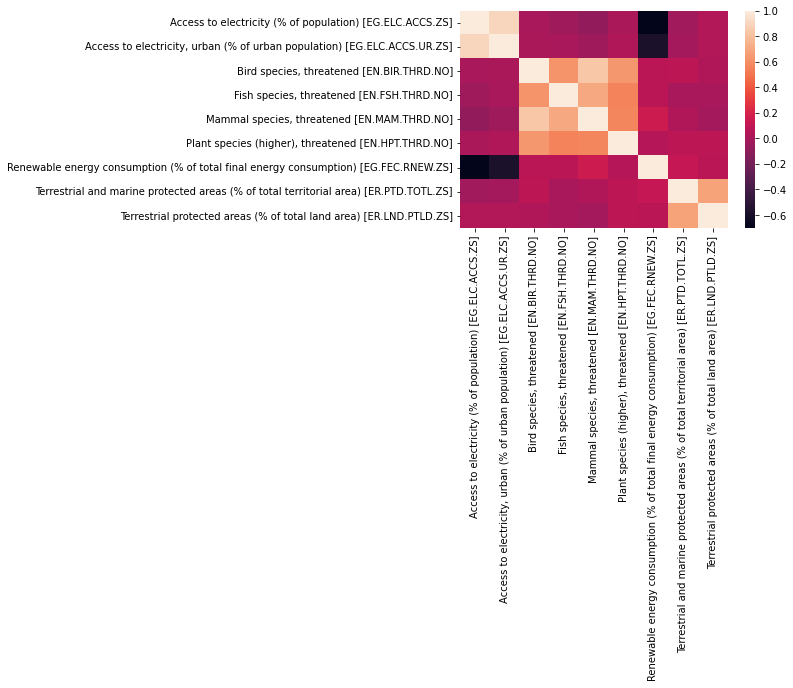

In [ ]:
print(sns.heatmap(df.corr()))
df['Animal species, threatened']=df['Bird species, threatened [EN.BIR.THRD.NO]']+df['Fish species, threatened [EN.FSH.THRD.NO]']+df['Mammal species, threatened [EN.MAM.THRD.NO]']
df=df.drop(['Bird species, threatened [EN.BIR.THRD.NO]','Fish species, threatened [EN.FSH.THRD.NO]','Mammal species, threatened [EN.MAM.THRD.NO]','Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]','Terrestrial protected areas (% of total land area) [ER.LND.PTLD.ZS]'],axis=1)

###Normalize the species by the total number of threatened species and rename the columns.

In [ ]:
df['Plant species (higher), threatened [EN.HPT.THRD.NO]']=df['Plant species (higher), threatened [EN.HPT.THRD.NO]'].div(np.cumsum(df['Plant species (higher), threatened [EN.HPT.THRD.NO]'])[len(df)+1])
df['Animal species, threatened']=df['Animal species, threatened'].div(np.cumsum(df['Animal species, threatened'])[len(df)+1])
df=df.rename(columns={'Animal species, threatened':'Animal species, threatened (% of total)','Access to electricity (% of population) [EG.ELC.ACCS.ZS]':'Access to electricity (% of population)',
                      'Plant species (higher), threatened [EN.HPT.THRD.NO]':'Plant species (higher), threatened (% of total)','Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]':'Renewable energy consumption (% of total final energy consumption)',
                      'Terrestrial and marine protected areas (% of total territorial area) [ER.PTD.TOTL.ZS]':'Terrestrial and marine protected areas (% of total territorial area)',})

In [ ]:
df=df.reset_index(drop=True) #Reset the index

2 Object selection
================

* Remove objects containing missing values (except if using methods that handle clearly the missing values).

* Identified the outliers (exceptional objects, noise, ...) in 1D, 2D, n-dimensions. Keep track of them and eventually remove them.

###Plot the boxplot to see if there are outliers present.

[]

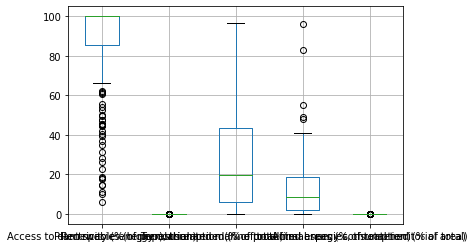

In [ ]:
b_plot = df.boxplot(column = ['Access to electricity (% of population)','Plant species (higher), threatened (% of total)',
                              'Renewable energy consumption (% of total final energy consumption)',
                              'Terrestrial and marine protected areas (% of total territorial area)','Animal species, threatened (% of total)']) 
b_plot.plot()

###Replace the outliers by looking at the interquartile range and replace the values with NaN. The rows containing NaN are then removed from the dataset.

In [ ]:
a=df.columns[4:len(df.columns)+1]
b=np.zeros(len(df))
for column in a:
  q75,q25 = np.percentile(df[column],[75,25])
  intr_qr = q75-q25
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
  for x in range(len(b)): 
    if df[column][x] < min:
      df[column].replace(df[column][x], np.nan, inplace=True)
    elif df[column][x] > max:
      df[column].replace(df[column][x], np.nan, inplace=True)
    else:
      continue

v=[]

for x in range(len(df)):
  if pd.isna(df.iloc[x]).sum() > 0:
    v.append(x)

for row in v:
  df = df.drop([row], axis=0)

df=df.reset_index(drop=True)

df

,Time,Time Code,Country Name,Country Code,Access to electricity (% of population),"Plant species (higher), threatened (% of total)",Renewable energy consumption (% of total final energy consumption),Terrestrial and marine protected areas (% of total territorial area),"Animal species, threatened (% of total)"
0,2018,YR2018,Afghanistan,AFG,96.616135,0.000348,17.96,0.104707,0.002225
1,2018,YR2018,Albania,ALB,100.000000,0.000279,38.11,13.525683,0.003948
2,2018,YR2018,Algeria,DZA,99.697838,0.001533,0.19,7.105493,0.005025
3,2018,YR2018,Andorra,AND,100.000000,0.000000,18.58,26.727725,0.000359
4,2018,YR2018,Antigua and Barbuda,ATG,100.000000,0.000279,0.90,0.258340,0.002584
...,...,...,...,...,...,...,...,...,...
134,2018,YR2018,United Kingdom,GBR,100.000000,0.002926,10.99,28.825234,0.004594
135,2018,YR2018,Uruguay,URY,99.800003,0.001533,60.86,2.295077,0.005528
136,2018,YR2018,Uzbekistan,UZB,100.000000,0.001115,1.49,3.375214,0.002584
137,2018,YR2018,"Venezuela, RB",VEN,99.911201,0.005991,14.57,36.902552,0.009476
